### P4-1 (AE Numérique 1) : 
# Représenter un signal périodique et illustrer l’influence de ses caractéristiques (période, amplitude) sur sa représentation.

### Rappel de cours :
Amplitude en un point donné au cours du temps :
y(t) = A * cos ( 2*Pi * t / T ) 

$y(t) = A \times \cos \left(2\pi \dfrac{  t }{T} \right) $

Amplitude à un instant donné en fonction de la position :
y(x) = A * cos ( 2*Pi * x / lambda )

$y(x) = A \times \cos \left(2\pi \dfrac{ x }{\lambda} \right) $


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
Pi = np.pi

## 1. Signal en un point au cours du temps
**TRAVAIL À FAIRE** : Modifier l'amplitude $A$ ou la période $T$ pour observer l'influence sur la représentation du signal.


**COMPÉTENCES NUMÉRIQUES ATTENDUES** : 
- Savoir identifier et modifier des paramètres dans une suite d'instructions.
- Connaître la syntaxe basique pour tracer un graphique (avec le module matpltlib.pyplot) :
            plt.plot(liste_abscisses, liste_ordonnees)
- Découvrir (et modifier si nécessaire) quelques paramètres de graphique (ex :  titre, légende, couleurs...).


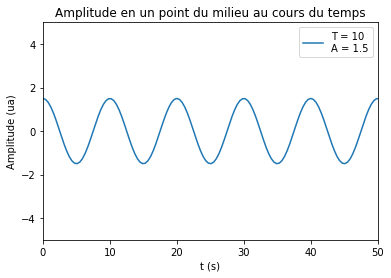

In [3]:
A = 1.5 # amplitude en unité arbitraire (ua)
T = 10  # période en s

# création des instants
t = np.linspace(0, 10*T, 256) # 256 instants répartis de t=0 à t=10T

# calcul de l'amplitude 
y = A*np.cos(2*Pi*t/T)

# bornes des axes du graphiques (il faut fixer les bornes pour voir l'influence d'un changement de A ou T)
plt.xlim(0, 50)
plt.ylim(-5, 5)

# graphique
plt.plot(t, y, label=f'T = {T}\nA = {A}')
plt.legend()
plt.ylabel('Amplitude (ua)')
plt.xlabel('t (s)')
plt.title('Amplitude en un point du milieu au cours du temps')
plt.show()

### 1.bis Utilisation de widgets de contrôles (nettement plus compliqué !)
*Remarque* : le code suivant n'est pas à comprendre, mais vous pouvez néanmoins exploiter la cellule suivante pour voir rapidement l'influence de la péridode ou de l'maplitude sur l'allure du signal.

**TRAVAIL À FAIRE** : Modifier **à l'aide des curseurs** l'amplitude $A$ ou la période $T$ pour observer l'influence sur la représentation du signal.



**COMPÉTENCES NUMÉRIQUES ATTENDUES** : 
- Aucune ici ! Il suffit juste d'exploiter un code fourni...

In [4]:
# librairie complémentaire pour les widgets
import matplotlib.widgets as mpw 

<IPython.core.display.Javascript object>


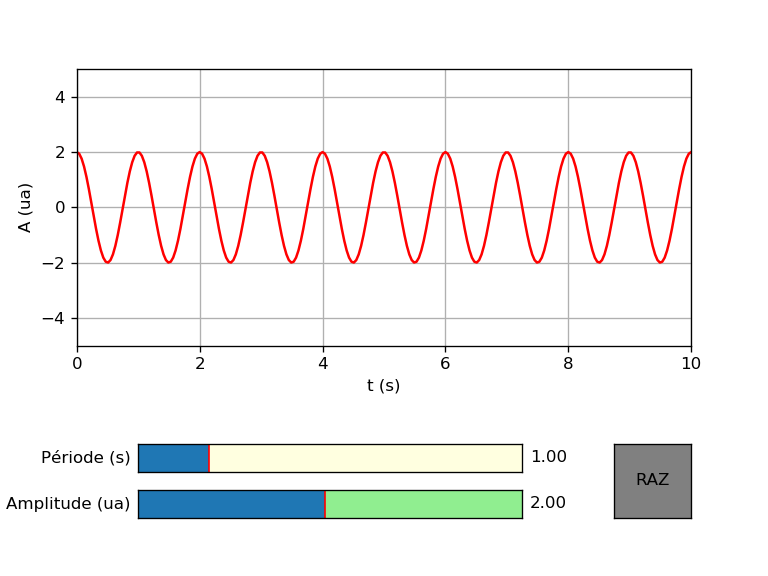

In [5]:
# backend permettant l'interactivité
%matplotlib notebook

fig, ax = plt.subplots()
plt.xlabel('t (s)')
plt.ylabel('A (ua)')
plt.grid()
plt.subplots_adjust(left=0.1, bottom=0.4) # positionnement de la zone graphique pour laisser de l'espace aux widgets

T = 1      # période en s
tmax = 10  # graphique sur 10 s max
t = np.linspace(0, tmax, 256)
A = 2      # amplitude en ua
y = A*np.cos(2*Pi*t/T)

courbe, = plt.plot(t, y, color='red')      # conserve la référence de la courbe (Artist)
plt.axis(xmin=0, xmax=10, ymin=-5, ymax=5) # plages des abscisses et ordonnées

# définition des 'axes' pour contenir les widgets
ax_A = plt.axes([0.18, 0.1, 0.5, 0.05], facecolor='lightgreen')
ax_T = plt.axes([0.18, 0.18, 0.5, 0.05], facecolor='lightyellow')

# création des widgets
slider_T = mpw.Slider(ax_T, 'Période (s)', 0.1, 5, valinit=T)
slider_A = mpw.Slider(ax_A, 'Amplitude (ua)', 0.1, 4, valinit=A)

def maj(val):
    A = slider_A.val
    T = slider_T.val
    courbe.set_ydata(A*np.cos(2*Pi*t/T)) # maj des données de la courbe
    fig.canvas.draw_idle()               # maj du tracé de la courbe

# action à effectuer lors de l'utilisation des widgets    
slider_T.on_changed(maj)
slider_A.on_changed(maj)

# ajout d'un bouton de Remise à zéro (RAZ) des paramètres
ax_RAZ = plt.axes([0.8, 0.1, 0.1, 0.13])
button_RAZ = mpw.Button(ax_RAZ, 'RAZ', color='gray', hovercolor='0.777')

def raz(event):
    slider_A.reset()
    slider_T.reset()
    
button_RAZ.on_clicked(raz)

plt.show()

## 2. Signal en fonction de la position à un instant donné

**TRAVAIL À FAIRE** : Modifier l'amplitude $A$ ou la longueur d'onde $\lambda$ pour observer l'influence sur la représentation du signal.



**COMPÉTENCES NUMÉRIQUES ATTENDUES** : 
- les mêmes que pour la partie 1.

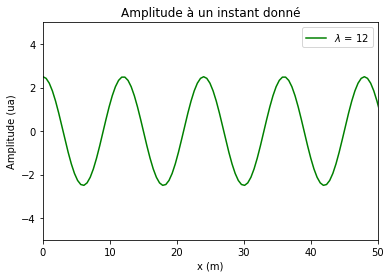

In [6]:
%matplotlib inline
A = 2.5      # amplitude en unité arbitraire (ua)
lambda_ = 12 # longueur d'onde en m

# création des positions
x = np.linspace(0, 10*lambda_, 256) # 256 positions réparties de x=0 à x=10 lambda

# calcul de l'amplitude 
y = A*np.cos(2*Pi*x/lambda_)

# bornes des axes du graphiques (il faut fixer les bornes pour voir l'influence d'un changement de A ou lambda)
plt.xlim(0, 50)
plt.ylim(-5, 5)

# graphique
plt.plot(x, y, color='green', label=f'$\lambda$ = {lambda_}')
plt.legend()
plt.ylabel('Amplitude (ua)')
plt.xlabel('x (m)')
plt.title('Amplitude à un instant donné')
plt.show()